<a href="https://colab.research.google.com/github/alencar-heitor/Colab-Notebook/blob/main/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando

In [ ]:
try:
  import sklearn
  from sklearn import datasets
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import *
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import warnings
  warnings.filterwarnings("ignore")
except Exception as err:
  print(err)


Carregando Database

In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/DSA/Datasets/diabetes.csv')

# Separando Treino e Teste - Classificação

In [ ]:
X = diabetes.drop('resultado', axis=1)
y = diabetes['resultado']

SEED = 24
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, random_state=SEED) # padrão 0.25


Treinamento

Acuracidade Total 10: 0.9140625 

Acuracidade Total 9: 0.8958333333333334 

Acuracidade Total 8: 0.8684895833333334 

Acuracidade Total 7: 0.8489583333333334 

Acuracidade Total 6: 0.8216145833333334 

Acuracidade Total 5: 0.8046875 

Acuracidade Total 4: 0.796875 

Acuracidade Total 3: 0.76953125 

                  precision    recall  f1-score   support

testado_negativo       0.71      0.88      0.79       124
testado_positivo       0.62      0.35      0.45        68

        accuracy                           0.69       192
       macro avg       0.66      0.62      0.62       192
    weighted avg       0.68      0.69      0.67       192

(0.6927083333333334, 0.6927083333333334, 0.6927083333333334, None)


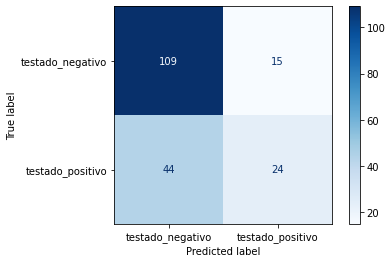

In [ ]:
from sklearn.tree import DecisionTreeClassifier

for profundidade in range(3,11):
  profundidade = 13 - profundidade
  clf_arvore = DecisionTreeClassifier(max_depth=profundidade)
  clf_arvore.fit(x_treino, y_treino)
  print('Acuracidade Total {}:'.format(profundidade), clf_arvore.score(X, y), '\n')

print(classification_report(y_teste, clf_arvore.predict(x_teste)))
print(precision_recall_fscore_support(y_teste, clf_arvore.predict(x_teste), average='micro'))
plot_confusion_matrix(clf_arvore, x_teste, y_teste, cmap='Blues')  
plt.show()

In [ ]:
'''from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(x_treino, y_treino)
clf_dummy.score(x_teste, y_teste)'''

"from sklearn.dummy import DummyClassifier\n\nclf_dummy = DummyClassifier(strategy='most_frequent')\nclf_dummy.fit(x_treino, y_treino)\nclf_dummy.score(x_teste, y_teste)"

Plotando Arvore

<function matplotlib.pyplot.show>

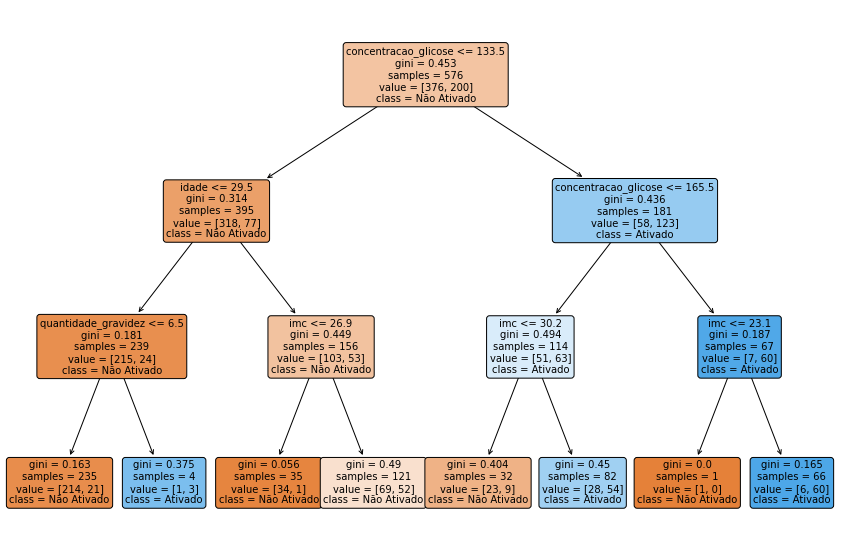

In [ ]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(clf_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])
plt.show